In [24]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path

In [25]:
object_name = 'dragon'

root = Path('/workspace')
outputs = root / f'pixel-perfect-sfm/outputs/{object_name}'

second_exp = outputs / 'experiment_2'
local_exp = outputs / 'query_localization_known_cameras'

images_mesh =  outputs / 'projected_texture'

In [30]:
n_row = 2
n_col = 3

exp_name = 'exp2_bef_ba_ref'


path = images_mesh / exp_name
render_views_list = [5, 35,78]
imgs = []

for i, num in enumerate(render_views_list):
    rng = [num - 1, num, num + 1]
    imgs.append([])
    for el in rng:
        imgs[i].append(f'{path}/{exp_name}_{el:04}.png')  
    
imgs    

[['/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0004.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0005.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0006.png'],
 ['/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0034.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0035.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0036.png'],
 ['/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0077.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0078.png',
  '/workspace/pixel-perfect-sfm/outputs/dragon/projected_texture/exp2_bef_ba_ref/exp2_bef_ba_ref_0079.png']]

/tmp/ipykernel_151419/4292023701.py:9: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )


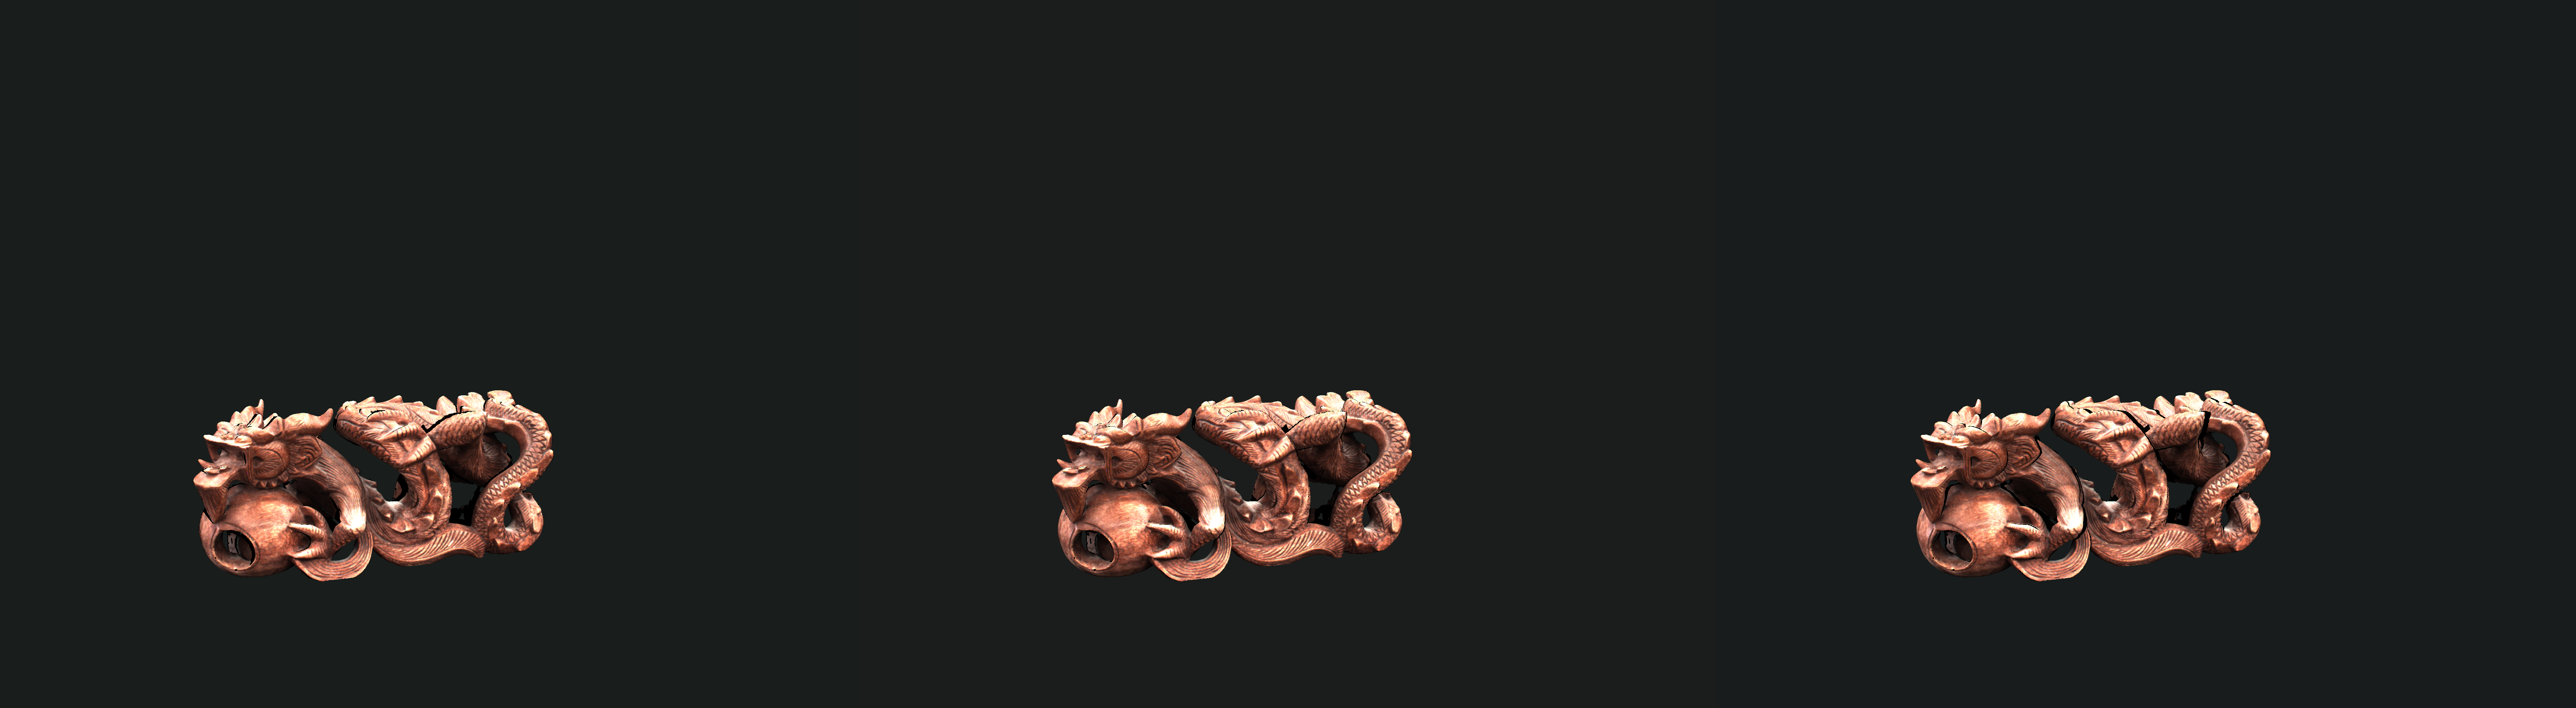

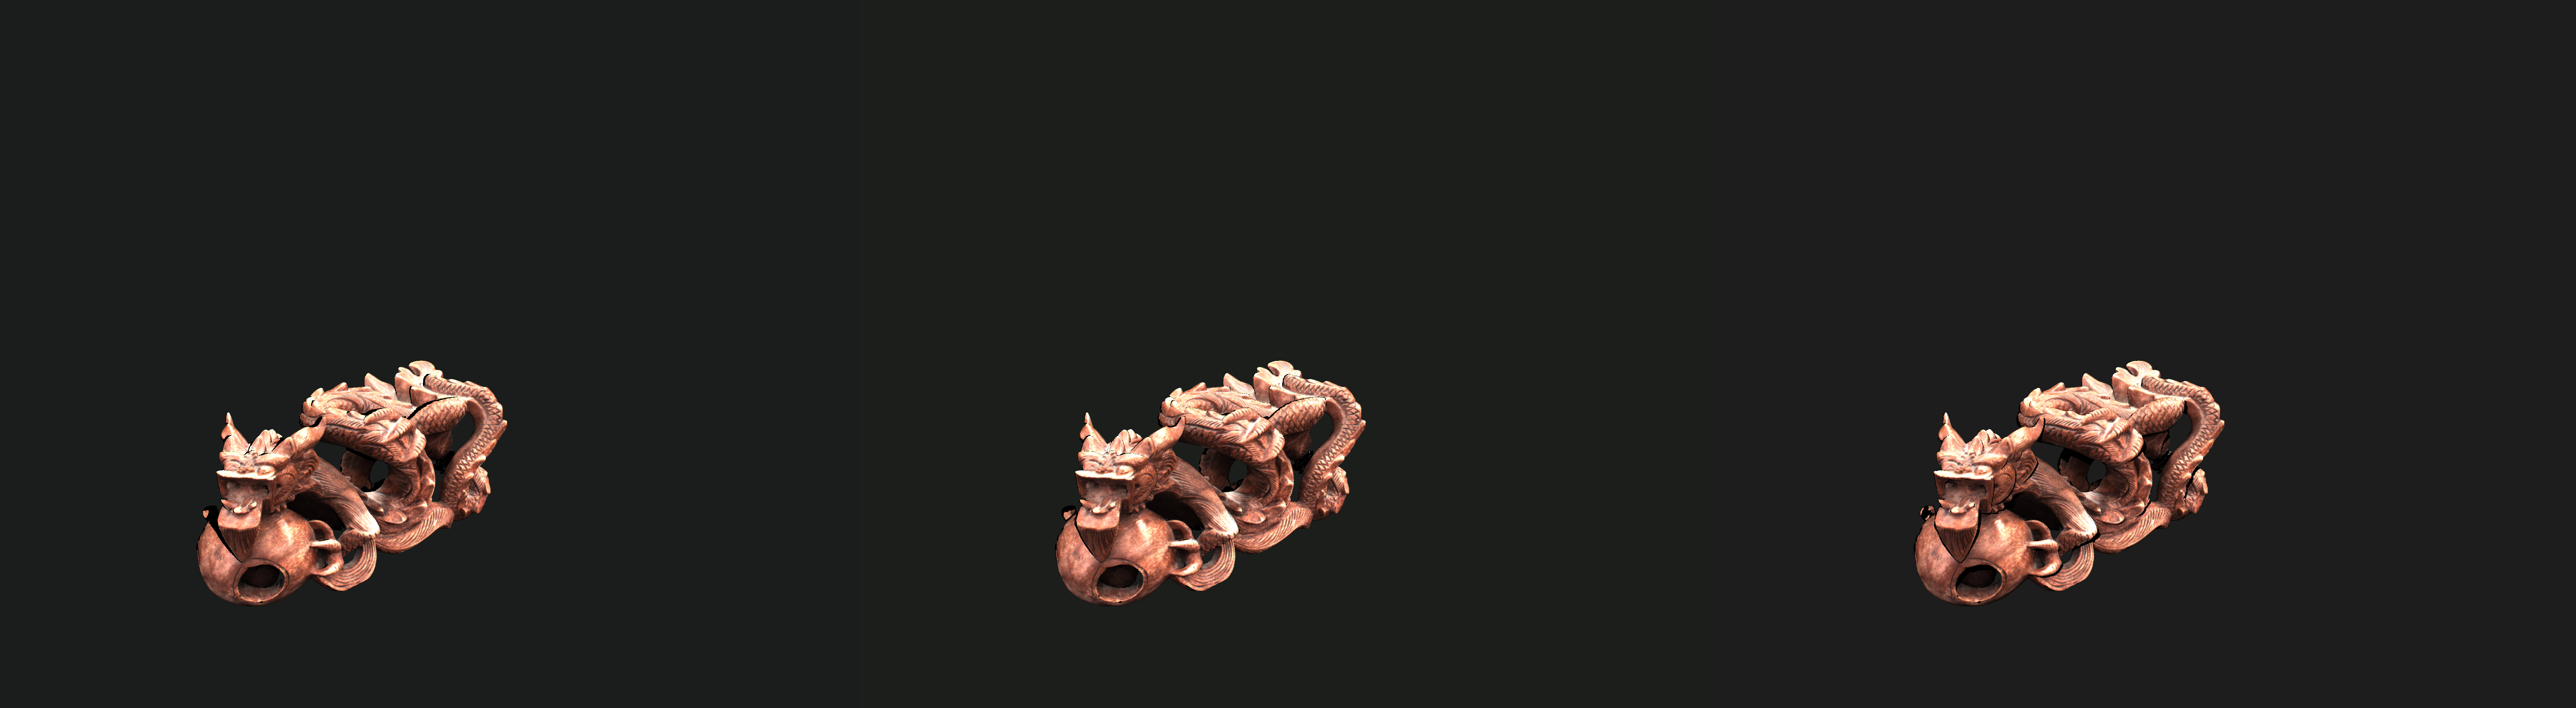

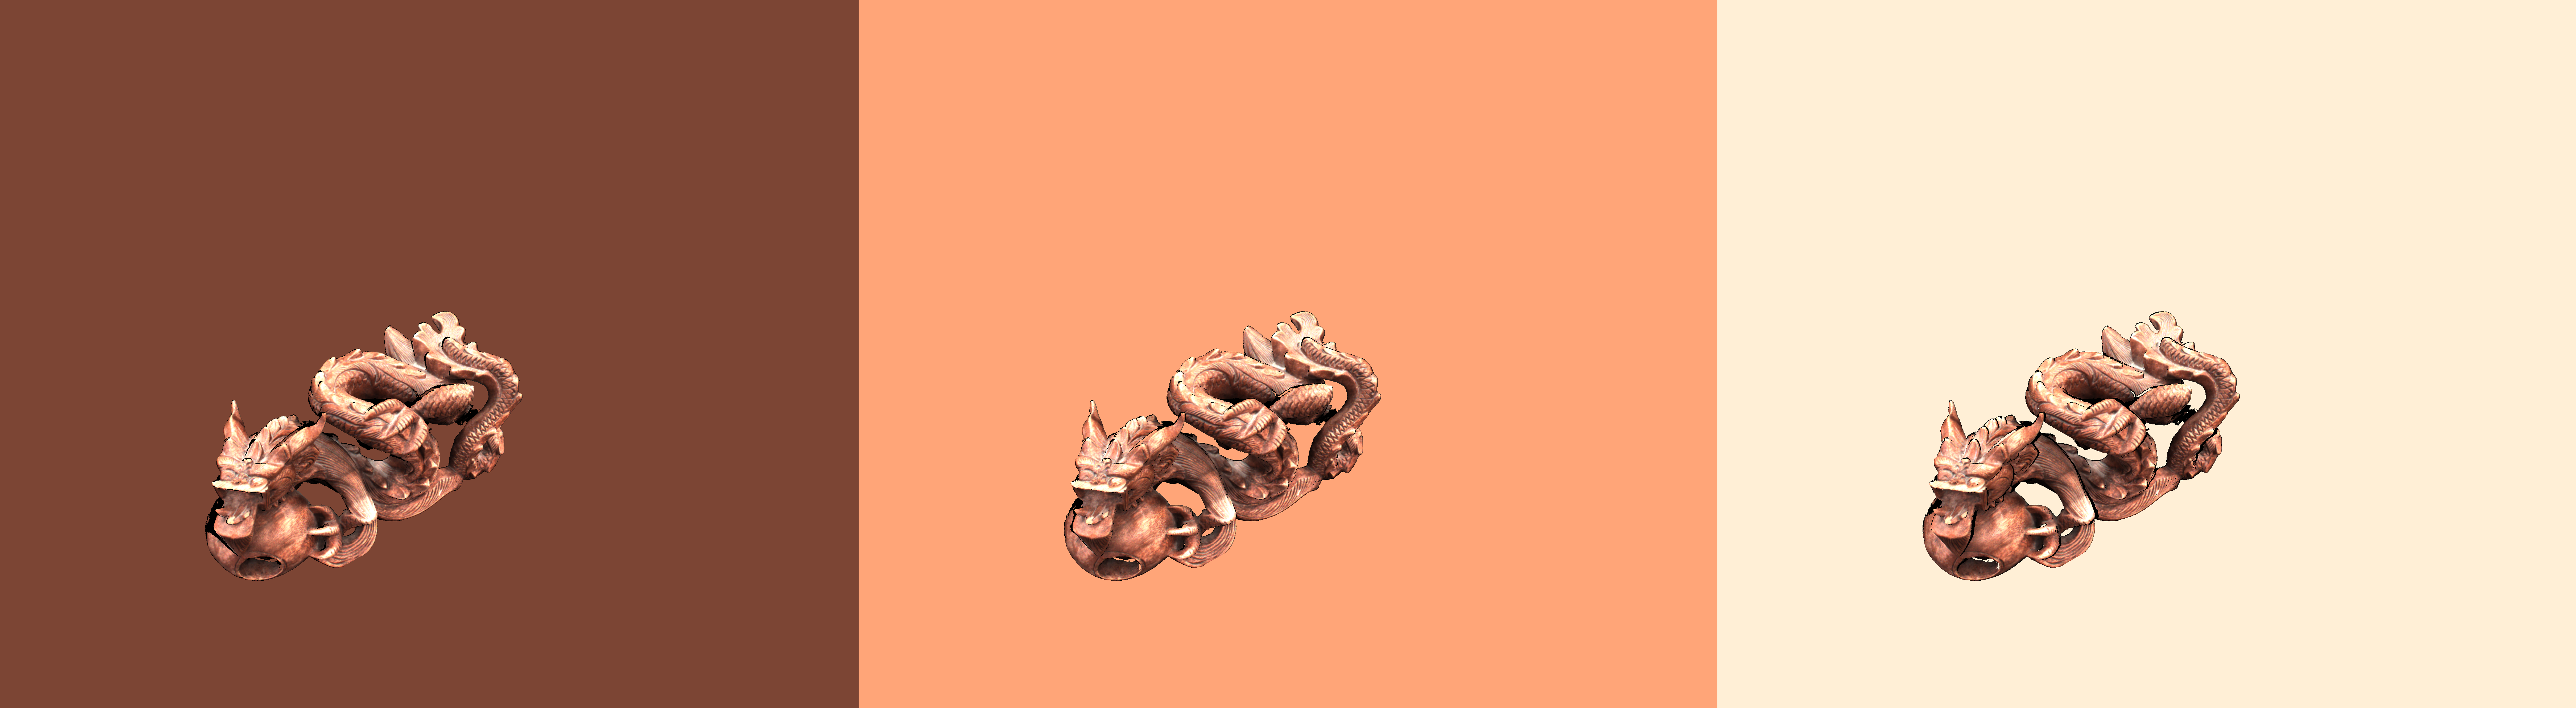

In [31]:
import numpy as np
import PIL
from IPython.display import display

for stack in imgs:
    imgs    = [ PIL.Image.open(i) for i in stack ]
    # pick the image which is the smallest, and resize the others to match it (can be arbitrary image shape here)
    min_shape = sorted( [(np.sum(i.size), i.size ) for i in imgs])[0][1]
    imgs_comb = np.hstack( (np.asarray( i.resize(min_shape) ) for i in imgs ) )

    # save that beautiful picture
    imgs_comb = PIL.Image.fromarray( imgs_comb)
    #imgs_comb.save( 'combo.jpg' )    

    display(imgs_comb)